In [1]:
# import library
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# seed
import os
seed = 123
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## Dataset

In [2]:
# load dataset
diabetes = load_diabetes()

# dataframe
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns=["Target"])
df = pd.concat([data, target], axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


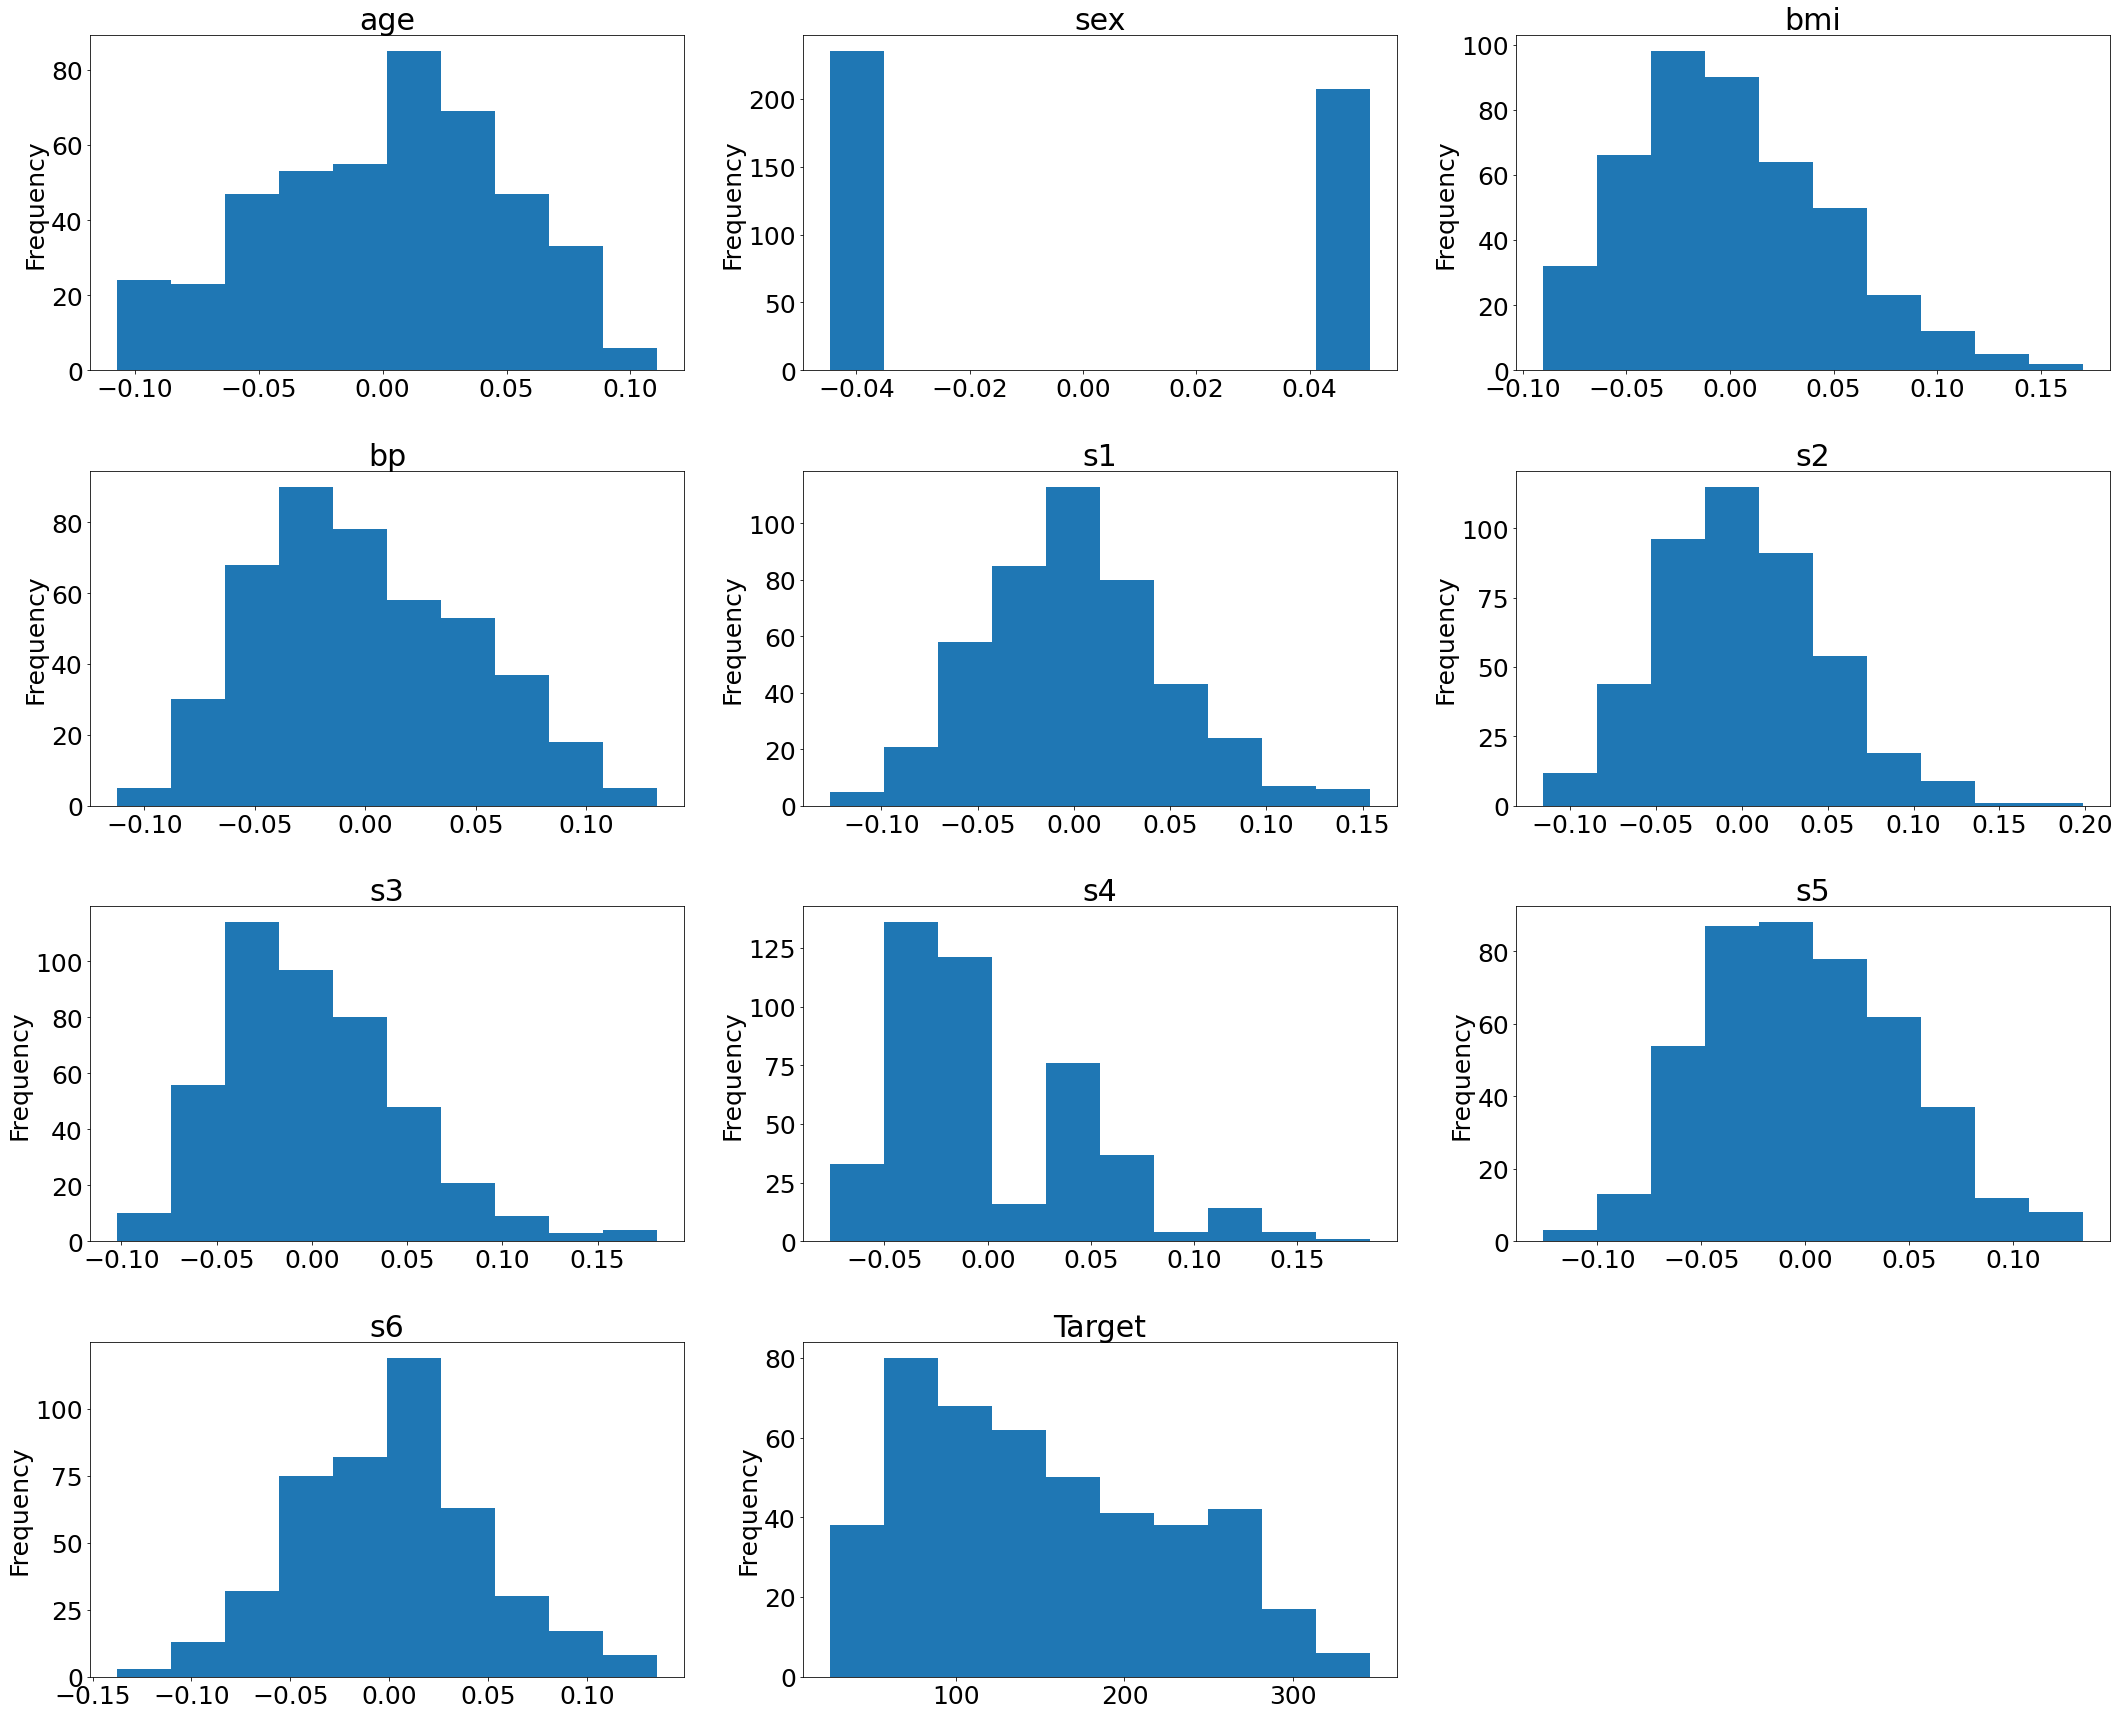

In [4]:
# 데이터 분포
plt.figure(figsize=(30,30))
for i in range(len(df.columns)):
    plt.rc('font', size=25)
    plt.subplot(5,3,i+1)
    df[df.columns[i]].plot.hist()
    plt.title(f'{df.columns[i]}')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.3)

## Feature importance

In [6]:
# dataset
x = diabetes.data
y = diabetes.target

In [9]:
# Decision Tree
def tree_model(data, label):
    tree = DecisionTreeRegressor(criterion='mse', max_depth=None,
                                 random_state=seed, min_samples_leaf=1,
                                 min_samples_split=2, splitter='best')
    tree_fit = tree.fit(data, label)
    #print(tree.feature_importances_)
    
    Importance = pd.DataFrame({'Importance':tree.feature_importances_*100}, 
                              index=diabetes.feature_names)
    plt.rc('font', size=8)
    Importance.sort_values(by='Importance', axis=0,
                           ascending=True).plot(kind='barh', color='r')
    plt.title('Decision tree')
    plt.xlabel('Feature importance')

# RandomForest
def rf_model(data, label):
    rf = RandomForestRegressor(n_estimators=50, criterion='mse', 
                               max_depth=None, random_state=seed, 
                               min_samples_leaf=1, min_samples_split=2, 
                               min_impurity_split=None)
    rf_fit = rf.fit(data, label)
    #print(rf.feature_importances_)
    Importance = pd.DataFrame({'Importance':rf.feature_importances_*100},
                              index=diabetes.feature_names)
    plt.rc('font', size=8)
    Importance.sort_values(by='Importance', axis=0,
                           ascending=True).plot(kind='barh', color='r')
    plt.title('Random forest')
    plt.xlabel('Feature importance')
    
# AdaBoost
def adabst_model(data, label):
    adabst = AdaBoostRegressor(base_estimator=None, n_estimators=50, 
                               learning_rate=1.0, loss='linear', 
                               random_state=seed)
    adabst_fit = adabst.fit(data, label)
    #print(adabst.feature_importances_)
    Importance = pd.DataFrame({'Importance':adabst.feature_importances_*100}, 
                              index=diabetes.feature_names)
    plt.rc('font', size=8)
    Importance.sort_values(by='Importance', axis=0,
                           ascending=True).plot(kind='barh', color='r')
    plt.title('Adaboost')
    plt.xlabel('Feature importance')
    
def xgb_model(data, label):
    xgb = XGBRegressor(n_estimators=50, random_state=seed)
    xgb_fit = xgb.fit(data, label)
    #print(xgb.feature_importances_)
    Importance = pd.DataFrame({'Importance':xgb.feature_importances_*100},
                              index=diabetes.feature_names)
    Importance.sort_values(by='Importance', axis=0, 
                           ascending=True).plot(kind='barh', color='r')
    plt.title('Xgboost')
    plt.xlabel('Feature importance')
    plt.rc('font', size=8)
    
def lgbm_model(data, label):
    lgbm = LGBMRegressor(n_estimators=50, random_state=seed)
    lgbm_fit = lgbm.fit(data, label)
    #print(lgbm.feature_importances_)
    Importance = pd.DataFrame({'Importance':lgbm.feature_importances_},
                              index=diabetes.feature_names)
    plt.rc('font', size=8)
    Importance.sort_values(by='Importance', axis=0, 
                           ascending=True).plot(kind='barh', color='r')
    plt.title('LightGBM')
    plt.xlabel('Feature importance')

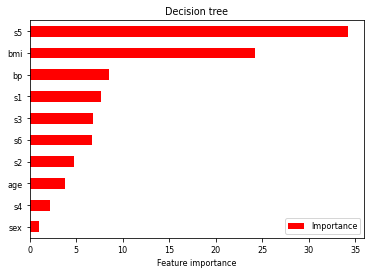

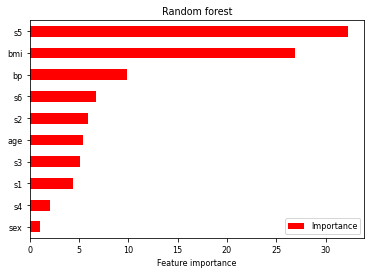

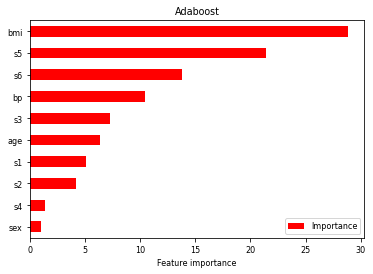

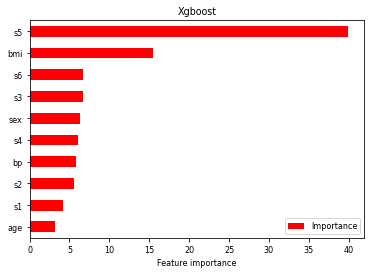

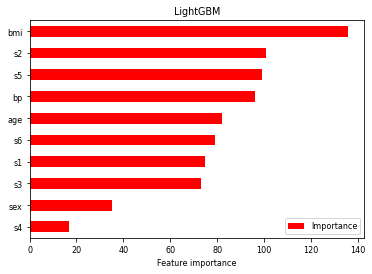

In [10]:
tree_model(x, y)
rf_model(x, y)
adabst_model(x, y)
xgb_model(x, y)
lgbm_model(x, y)

## Data preprocessing

In [11]:
# data preprocess
def prepro(data, method):
    if method == 'minmax':
        scaler = MinMaxScaler()
        x = data.reshape(-1,1)
        scaler.fit(x)
        tmp = scaler.transform(x)
        return np.squeeze(tmp, axis=1)
    
    if method == 'stand':
        scaler = StandardScaler()
        x = data.reshape(-1,1)
        scaler.fit(x)
        tmp = scaler.transform(x)
        return np.squeeze(tmp, axis=1)
    
    if method == 'robust':
        scaler = RobustScaler()
        x = data.reshape(-1,1)
        scaler.fit(x)
        tmp = scaler.transform(x)
        return np.squeeze(tmp, axis=1)
    
    if method == 'maxabs':
        scaler = MaxAbsScaler()
        x = data.reshape(-1,1)
        scaler.fit(x)
        tmp = scaler.transform(x)
        return np.squeeze(tmp, axis=1)

In [12]:
# PCA
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

n = np.argmax(cumsum >= 0.95) + 1
print(n)

def pca_data(data, n):
    pca = PCA(n_components=n)
    x = data.copy()
    w = pca.fit_transform(x)
    return w

[0.40242142 0.55165324 0.67224947 0.76779711 0.83401567 0.89428759
 0.94794364 0.99131196 0.99914395 1.        ]
8


In [13]:
x_minmax = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_minmax[:,i] = prepro(x[:,i], 'minmax')

x_stand = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_stand[:,i] = prepro(x[:,i], 'stand')

x_robust = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_robust[:,i] = prepro(x[:,i], 'robust')

x_maxabs = np.zeros((x.shape[0], x.shape[1]))
for i in range(len(x[0])):
    x_maxabs[:,i] = prepro(x[:,i], 'maxabs')

x_pca_7 = pca_data(x, 7)
x_pca_8 = pca_data(x, 8)

print(x_minmax.shape)
print(x_stand.shape)
print(x_robust.shape)
print(x_maxabs.shape)
print(x_pca_7.shape)
print(x_pca_8.shape)

(442, 10)
(442, 10)
(442, 10)
(442, 10)
(442, 7)
(442, 8)


## Hyperparameter tuning

### Grid search / Random search

In [ ]:
model_input = Input(shape=x_train.shape)

def DNN(model_input, drop):
    x = Dense(100, activation='selu')(model_input)
    x = Dropout(0.2)(x)
    x = Dense(50, activation='selu')(x)
    x = Dropout(0.2)(x)
    x = Dense(10, activation='selu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs=model_input, outputs=outputs)
    model.compile(optimizer = optimizer, metrics = ['mse'],
                  loss = 'mse')
    
    return model

In [ ]:
def hyperparameters():
    dropout = [0.1, 0.2, 0.3, 0.4, 0.5]
    batches = [32, 64, 128]
    optimizers = ['adam', 'adadelta', 'rmsprop']
    return {'drop':dropout, 'batch_size':batches, 'optimizer':optimizers}
hyperparameters = hyperparameters()

In [ ]:
model = KerasRegressor(build_fn = DNN, verbose=1)
Gsearch = GridSearchCV(model, hyperparameters, cv=5)
Rsearch = RandomizedSearchCV(model, hyperparameters, cv=5)

In [ ]:
best_Gmodel = Gsearch.fit(x_train, y_train, epochs=10)
best_Rmodel = Rsearch.fit(x_train, y_train, epochs=10)

In [ ]:
print(Gsearch.best_params_)
print(Rsearch.best_params_)

In [ ]:
Gpred = best_Gmodel.predict(x_test)
Rpred = best_Rmodel.predict(x_test)